In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [21]:
train_df = pd.read_csv("./Project_3-DataScience_Jobchance_prediction/Data/train.csv") # Replace With Your Dir
test_df = pd.read_csv("./Project_3-DataScience_Jobchance_prediction/Data/test.csv") # Replace With Your Dir

In [22]:
train_df.head()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [23]:
# Check the data types of features and non-null values
print(train_df.info())

# # Check the unique values and their counts for categorical features
print(train_df.nunique())

# # # Check the distribution of the target variable
print(train_df['target'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [24]:
# Handling missing values
train_df['gender'].fillna('NotSpecified', inplace=True)
train_df['enrolled_university'].fillna('NotSpecified', inplace=True)
train_df['education_level'].fillna('NotSpecified', inplace=True)
train_df['major_discipline'].fillna('NotSpecified', inplace=True)
train_df['experience'].fillna('NotSpecified', inplace=True)
train_df['company_size'].fillna('NotSpecified', inplace=True)
train_df['company_type'].fillna('NotSpecified', inplace=True)
train_df['last_new_job'].fillna('NotSpecified', inplace=True)


In [26]:
# Convert categorical features into numerical using one-hot encoding
train_df = pd.get_dummies(train_df, columns=['city', 'gender', 'relevent_experience', 'enrolled_university',
                                             'education_level', 'major_discipline', 'experience',
                                             'company_size', 'company_type', 'last_new_job'], drop_first=True)


In [28]:
train_df.dtypes

enrollee_id                    int64
city_development_index       float64
training_hours                 int64
target                       float64
city_city_10                   uint8
                              ...   
last_new_job_3                 uint8
last_new_job_4                 uint8
last_new_job_>4                uint8
last_new_job_NotSpecified      uint8
last_new_job_never             uint8
Length: 186, dtype: object

In [29]:
# Separate the features (X) and the target variable (y)
X_train = train_df.drop('target', axis=1)
y_train = train_df['target']


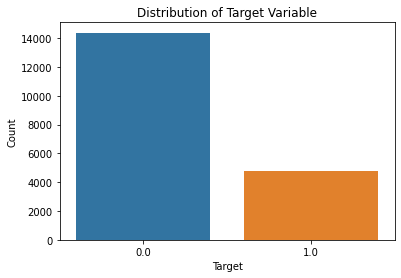

In [30]:
# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=train_df, x='target')
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

In [31]:
from imblearn.over_sampling import RandomOverSampler
# Create the RandomOverSampler object
oversampler = RandomOverSampler(random_state=42)

# Apply oversampling to the training data
X_train_balanced, y_train_balanced = oversampler.fit_resample(X_train, y_train)


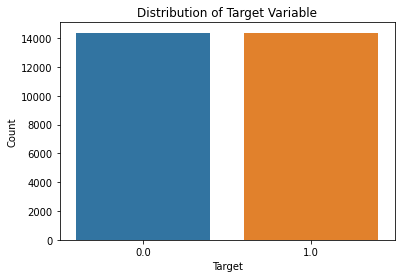

In [32]:
# Plot distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(data=y_train_balanced, x=y_train_balanced)
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


In [33]:
# Create the DecisionTreeClassifier with class_weight parameter
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model on the balanced training data
decision_tree_model.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

**Testing**

In [78]:
test_df = pd.read_csv("D:/Git Repos/DataScience_Projects/Project_3-DataScience_Jobchance_prediction/Data/test.csv")

In [79]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [80]:
# Data Preprocessing for Test Dataset (Assuming you already preprocessed the test dataset as mentioned earlier)
# Replace missing values and apply one-hot encoding
test_df['gender'].fillna('NotSpecified', inplace=True)
test_df['enrolled_university'].fillna('NotSpecified', inplace=True)
test_df['education_level'].fillna('NotSpecified', inplace=True)
test_df['major_discipline'].fillna('NotSpecified', inplace=True)
test_df['experience'].fillna('NotSpecified', inplace=True)
test_df['company_size'].fillna('NotSpecified', inplace=True)
test_df['company_type'].fillna('NotSpecified', inplace=True)
test_df['last_new_job'].fillna('NotSpecified', inplace=True)

# Reapply one-hot encoding to the test data using the same set of categorical features as the training data
test_df = pd.get_dummies(test_df, columns=['city', 'gender', 'relevent_experience', 'enrolled_university',
                                           'education_level', 'major_discipline', 'experience',
                                           'company_size', 'company_type', 'last_new_job'], drop_first=True)

# Ensure the test data columns match the training data columns
train_cols = set(X_train.columns)
test_cols = set(test_df.columns)
missing_cols = train_cols - test_cols
for col in missing_cols:
    test_df[col] = 0

# Remove any extra columns in the test data that are not present in the training data
extra_cols = test_cols - train_cols
test_df.drop(columns=extra_cols, inplace=True)

# Load the trained Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Assuming you have already trained the model on the balanced training data as 'X_train_balanced' and 'y_train_balanced'
# Fit the model on the balanced training data
decision_tree_model.fit(X_train_balanced, y_train_balanced)

# Make Predictions on the Test Data
y_pred_test = decision_tree_model.predict(test_df)


c:\Users\GEETHAN\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [108]:
output_df = pd.DataFrame({'enrollee_id': test_df['enrollee_id'], 'target': y_pred_test})
output_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  2129 non-null   int64  
 1   target       2129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.4 KB


In [109]:
# Load the Sample Submission Dataset
sample_submission_df = pd.read_csv("./Project_3-DataScience_Jobchance_prediction/Data/sample_submission.csv") # Replace With Your Dir
sample_submission_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   enrollee_id  2129 non-null   int64  
 1   target       2129 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 33.4 KB


In [110]:
merged_df = sample_submission_df.merge(output_df, on='enrollee_id')

In [118]:
true_labels = merged_df['target_x']
true_labels.dtype

dtype('float64')

In [119]:
predicted_labels = merged_df['target_y']
predicted_labels.head

<bound method NDFrame.head of 0       0.0
1       0.0
2       1.0
3       1.0
4       0.0
       ... 
2124    0.0
2125    0.0
2126    1.0
2127    0.0
2128    0.0
Name: target_y, Length: 2129, dtype: float64>

In [111]:
predicted_labels = merged_df['target_y'].astype(int)

In [112]:
true_labels = merged_df['target_x'].astype(int)

In [113]:
# Calculate Accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.67
